<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Descriptive Statistics


Estimated time needed: **30** minutes


In this lab, you'll go over some hands-on exercises using Python.


## Objectives


*   Import Libraries
*   Read in Data
*   Lab exercises and questions


***


## Import Libraries


All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. If you run this notebook in a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.


In [1]:
#! mamba install pandas==1.3.3/
#! mamba install numpy=1.21.2
#!  mamba install matplotlib=3.4.3-y

Import the libraries we need for the lab


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

Read in the csv file from the URL using the request library


In [3]:
ratings_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
ratings_df=pd.read_csv(ratings_url)


## Data Description

| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| minority    | Does the instructor belong to a minority (non-Caucasian) group?                                                                                      |
| age         | The professor's age                                                                                                                                  |
| gender      | Indicating whether the instructor was male or female.                                                                                                |
| credits     | Is the course a single-credit elective?                                                                                                              |
| beauty      | Rating of the instructor's physical appearance by a panel of six students averaged across the six panelists and standardized to have a mean of zero. |
| eval        | Course overall teaching evaluation score, on a scale of 1 (very unsatisfactory) to 5 (excellent).                                                    |
| division    | Is the course an upper or lower division course?                                                                                                     |
| native      | Is the instructor a native English speaker?                                                                                                          |
| tenure      | Is the instructor on a tenure track?                                                                                                                 |
| students    | Number of students that participated in the evaluation.                                                                                              |
| allstudents | Number of students enrolled in the course.                                                                                                           |
| prof        | Indicating instructor identifier.                                                                                                                    |


## Display information about the dataset

1.  Structure of the dataframe
2.  Describe the dataset
3.  Number of rows and columns


print out the first five rows of the data


In [4]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


get information about each variable


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minority         463 non-null    object 
 1   age              463 non-null    int64  
 2   gender           463 non-null    object 
 3   credits          463 non-null    object 
 4   beauty           463 non-null    float64
 5   eval             463 non-null    float64
 6   division         463 non-null    object 
 7   native           463 non-null    object 
 8   tenure           463 non-null    object 
 9   students         463 non-null    int64  
 10  allstudents      463 non-null    int64  
 11  prof             463 non-null    int64  
 12  PrimaryLast      463 non-null    int64  
 13  vismin           463 non-null    int64  
 14  female           463 non-null    int64  
 15  single_credit    463 non-null    int64  
 16  upper_division   463 non-null    int64  
 17  English_speaker 

get the number of rows and columns - prints as (number of rows, number of columns)


In [6]:
ratings_df.shape

(463, 19)

## Lab Exercises


### Can you identify whether the teachers' Rating data is a time series or cross-sectional?


Print out the first ten rows of the data

1.  Does it have a date or time variable? - No - it is not a time series dataset
2.  Does it observe more than one teacher being rated? - Yes - it is cross-sectional dataset

> The dataset is a Cross-sectional


In [7]:
ratings_df.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


### Find the mean, median, minimum, and maximum values for students


Find Mean value for students


In [8]:
ratings_df['students'].mean()

36.62419006479482

Find the Median value for students


In [9]:
ratings_df['students'].median()

23.0

Find the Minimum value for students


In [10]:
ratings_df['students'].min()

5

Find the Maximum value for students


In [11]:
ratings_df['students'].max()

380

### Produce a descriptive statistics table


In [12]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Create a histogram of the beauty variable and briefly comment on the distribution of data


using the <code>matplotlib</code> library, create a histogram


(array([16., 51., 94., 66., 94., 42., 29., 40., 11., 20.]),
 array([-1.45049405, -1.10844234, -0.76639063, -0.42433892, -0.08228722,
         0.25976449,  0.6018162 ,  0.94386791,  1.28591962,  1.62797133,
         1.97002304]),
 <BarContainer object of 10 artists>)

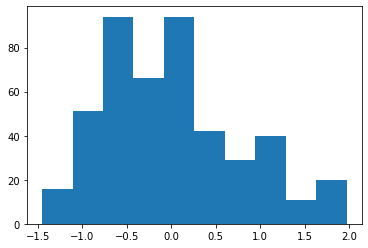

In [36]:
pyplot.hist(ratings_df['beauty'])

here are few conclusions from the histogram
most of the data for beauty is around the -0.5 and 0
the distribution is skewed to the right
therefore looking at the data we can say the mean is close to 0


### Does average beauty score differ by gender? Produce the means and standard deviations for both male and female instructors.


Use a group by gender to view the mean scores of the beauty we can say that beauty scores differ by gender as the mean beauty score for women is higher than men


In [14]:
ratings_df.groupby('gender').agg({'beauty':['mean', 'std', 'var']}).reset_index()

gender    beauty                   
               mean      std       var
0  female  0.116109  0.81781  0.668813
1    male -0.084482  0.75713  0.573246

### Calculate the percentage of males and females that are tenured professors. Will you say that tenure status differ by gender?


First groupby to get the total sum


In [34]:
tenure_count = ratings_df[ratings_df.tenure == 'yes'].groupby('gender').agg({'tenure': 'count'}).reset_index()
tenure_count

,gender,tenure
0,female,145
1,male,216


Find the percentage


In [35]:
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
tenure_count

,gender,tenure,percentage
0,female,145,40.166205
1,male,216,59.833795


## Practice Questions


### Question 1: Calculate the percentage of visible minorities are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [33]:
## insert code here
minorities_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
minorities_count['percentage'] = 100 * minorities_count.tenure/minorities_count.tenure.sum()
minorities_count

,minority,tenure,percentage
0,no,399,86.177106
1,yes,64,13.822894


Double-click **here** for the solution.

<!-- The answer is below:
### we can use a groupby function for this
## first groupby to get the total sum
tenure_count = ratings_df.groupby('minority').agg({'tenure': 'count'}).reset_index()
# Find the percentage
tenure_count['percentage'] = 100 * tenure_count.tenure/tenure_count.tenure.sum()
##print to see
tenure_count
-->


### Question 2: Does average age differ by tenure? Produce the means and standard deviations for both tenured and untenured professors.


In [32]:
## insert code here
ratings_df.groupby('tenure').agg({'beauty':['mean','std']}).reset_index()

tenure    beauty          
              mean       std
0     no  0.028359  0.876656
1    yes -0.008013  0.763074

Double-click **here** for the solution.

<!-- The answer is below:
## group by tenureship and find the mean and standard deviation for each group
ratings_df.groupby('tenure').agg({'age':['mean', 'std']}).reset_index()
-->


### Question 3: Create a histogram for the age variable.


(array([41., 37., 58., 48., 75., 74., 53., 69.,  0.,  8.]),
 array([29. , 33.4, 37.8, 42.2, 46.6, 51. , 55.4, 59.8, 64.2, 68.6, 73. ]),
 <BarContainer object of 10 artists>)

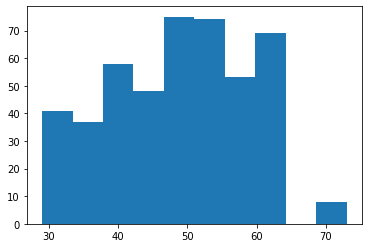

In [30]:
## insert code here
pyplot.hist(ratings_df['age'])

Double-click **here** for the solution.

<!-- The answer is below:
pyplot.hist(ratings_df['age'])
-->


### Question 4: Create a bar plot for the gender variable.


Text(0.5, 1.0, 'Gender distribution bar plot')

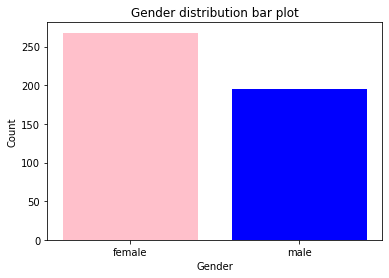

In [39]:
## insert code here
pyplot.bar(ratings_df.gender.unique(),ratings_df.gender.value_counts(),color=['pink','blue'])
pyplot.xlabel('Gender')
pyplot.ylabel('Count')
pyplot.title('Gender distribution bar plot')

Double-click **here** for the solution.

<!-- The answer is below:
pyplot.bar(ratings_df.gender.unique(),ratings_df.gender.value_counts(),color=['pink','blue'])
pyplot.xlabel('Gender')
pyplot.ylabel('Count')
pyplot.title('Gender distribution bar plot')
-->


> Note:Bar plot can be rendered vertically or horizontally. Try to replace **pyplot.bar** with **pyplot.barh** in the above cell and see the difference.


### Question 5: What is the Median evaluation score for tenured Professors?


In [42]:
## insert code here
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()

4.0

Double-click **here** for the solution.

<!-- The answer is below:
## you can index just tenured professors and find their median evaluation scores
ratings_df[ratings_df['tenure'] == 'yes']['eval'].median()
-->


## Authors


[Aije Egwaikhide](https://www.linkedin.com/in/aije-egwaikhide/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01) is a Data Scientist at IBM who holds a degree in Economics and Statistics from the University of Manitoba and a Post-grad in Business Analytics from St. Lawrence College, Kingston. She is a current employee of IBM where she started as a Junior Data Scientist at the Global Business Services (GBS) in 2018. Her main role was making meaning out of data for their Oil and Gas clients through basic statistics and advanced Machine Learning algorithms. The highlight of her time in GBS was creating a customized end-to-end Machine learning and Statistics solution on optimizing operations in the Oil and Gas wells. She moved to the Cognitive Systems Group as a Senior Data Scientist where she will be providing the team with actionable insights using Data Science techniques and further improve processes through building machine learning solutions. She recently joined the IBM Developer Skills Network group where she brings her real-world experience to the courses she creates.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description                     |
| ----------------- | ------- | --------------- | -------------------------------------- |
| 2020-08-14        | 0.1     | Aije Egwaikhide | Created the initial version of the lab |
| 2022-05-10        | 0.2     | Lakshmi Holla   | Added exercise for Bar plot            |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01).
